In [42]:
import pandas as pd

# Task 1

In [43]:
#Create dataframe from dictionary
data = {'Name': ['John', 'Anna', 'Peter', 'Linda'],'age':[23, 36, 32, 45],'city':['New York', 'Paris', 'Berlin', 'London']}
df = pd.DataFrame(data)
print(df)

    Name  age      city
0   John   23  New York
1   Anna   36     Paris
2  Peter   32    Berlin
3  Linda   45    London


In [44]:
# create a dataframe from list of dictionaries
data1 = [
    {"name": "Alice", "age": 25, "city": "New York"},
    {"name": "Bob", "age": 30, "city": "Los Angeles"},
    {"name": "Charlie", "age": 35, "city": "Chicago"}
]
df = pd.DataFrame(data1)
print(df)

      name  age         city
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago


In [45]:
# Load the dataset
df = pd.read_csv('messed_dataset.csv')
print(df.head())

                Name   Age                Email      Country    Salary  \
0            invalid  59.0  ycastro@example.org  Switzerland  44694.24   
1    David Jefferson  21.0                  NaN        China       NaN   
2      Jessica Reyes  34.0                  NaN          NaN  60511.62   
3  Kenneth Macdonald  68.0    ewolf@example.com        Italy  84223.29   
4        Julie Horne  78.0                  NaN      Ecuador  24665.13   

  DateOfJoining  
0    2022-09-29  
1    2021-10-04  
2    2022-05-24  
3    2022-04-07  
4    2020-06-19  


# Task 2

- Basic Data Cleaning

In [46]:
# Your code goes here

In [47]:
# Display the first and last few rows of the DataFrame.
print(df.head())
print(df.tail())

                Name   Age                Email      Country    Salary  \
0            invalid  59.0  ycastro@example.org  Switzerland  44694.24   
1    David Jefferson  21.0                  NaN        China       NaN   
2      Jessica Reyes  34.0                  NaN          NaN  60511.62   
3  Kenneth Macdonald  68.0    ewolf@example.com        Italy  84223.29   
4        Julie Horne  78.0                  NaN      Ecuador  24665.13   

  DateOfJoining  
0    2022-09-29  
1    2021-10-04  
2    2022-05-24  
3    2022-04-07  
4    2020-06-19  
                  Name   Age                     Email            Country  \
95    Garrett Davidson  56.0        gjames@example.com    Solomon Islands   
96      Elizabeth Ross  52.0  richardlewis@example.net  Equatorial Guinea   
97                 NaN  72.0       brian50@example.com            Somalia   
98      Patricia Singh  65.0      lramirez@example.org             Greece   
99  Christopher Stokes  42.0                       NaN       S

In [48]:
# Get a summary of the DataFrame, including basic statistics and data types.

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           89 non-null     object
 1   Age            97 non-null     object
 2   Email          80 non-null     object
 3   Country        86 non-null     object
 4   Salary         94 non-null     object
 5   DateOfJoining  79 non-null     object
dtypes: object(6)
memory usage: 4.8+ KB
None
           Name   Age                Email Country   Salary DateOfJoining
count        89    97                   80      86       94            79
unique       85    53                   80      76       93            79
top     invalid  76.0  ycastro@example.org   China  invalid    2022-09-29
freq          5     6                    1       2        2             1


In [49]:
# Display the shape and column names of the DataFrame.
print(df.shape)
print(df.columns)

(100, 6)
Index(['Name', 'Age', 'Email', 'Country', 'Salary', 'DateOfJoining'], dtype='object')


# Task 3
- Data Analysis. Analyse the data by giving the summary statistics, and more information about the data


In [50]:
# Your code goes here

# Select a single column and multiple columns.
print(df['Name'])
print(df[['Name', 'Age']])

0                invalid
1        David Jefferson
2          Jessica Reyes
3      Kenneth Macdonald
4            Julie Horne
             ...        
95      Garrett Davidson
96        Elizabeth Ross
97                   NaN
98        Patricia Singh
99    Christopher Stokes
Name: Name, Length: 100, dtype: object
                  Name   Age
0              invalid  59.0
1      David Jefferson  21.0
2        Jessica Reyes  34.0
3    Kenneth Macdonald  68.0
4          Julie Horne  78.0
..                 ...   ...
95    Garrett Davidson  56.0
96      Elizabeth Ross  52.0
97                 NaN  72.0
98      Patricia Singh  65.0
99  Christopher Stokes  42.0

[100 rows x 2 columns]


In [51]:
# Select rows by index and by label.
print(df.iloc[0]) # Select the first row
print(df.loc[5])    # Select the row with index 5

print(df.loc[[0, 1, 2]])    # Select multiple rows by label

Name                         invalid
Age                             59.0
Email            ycastro@example.org
Country                  Switzerland
Salary                      44694.24
DateOfJoining             2022-09-29
Name: 0, dtype: object
Name                     Jonathan Holland
Age                                  26.0
Email            mayercaitlin@example.org
Country                          Cameroon
Salary                           25660.99
DateOfJoining                  2023-05-01
Name: 5, dtype: object
              Name   Age                Email      Country    Salary  \
0          invalid  59.0  ycastro@example.org  Switzerland  44694.24   
1  David Jefferson  21.0                  NaN        China       NaN   
2    Jessica Reyes  34.0                  NaN          NaN  60511.62   

  DateOfJoining  
0    2022-09-29  
1    2021-10-04  
2    2022-05-24  


# Task 4
- Handling Missing Data

In [52]:
# Identify missing values in the DataFrame.
print(df.isnull().sum())
# Identify missing values in the DataFrame.
print(df[df.isnull().any(axis=1)])

Name             11
Age               3
Email            20
Country          14
Salary            6
DateOfJoining    21
dtype: int64
                  Name   Age                        Email  \
1      David Jefferson  21.0                          NaN   
2        Jessica Reyes  34.0                          NaN   
4          Julie Horne  78.0                          NaN   
6          James Clark  80.0          ynguyen@example.net   
8    Barbara Armstrong  22.0        fmitchell@example.com   
11        Keith Deleon  56.0       josephwall@example.com   
12       Kelly Schultz  21.0                          NaN   
14         James Lloyd  53.0                          NaN   
16                 NaN  73.0   johnstonkrista@example.com   
17                 NaN   NaN          julia08@example.com   
18          Greg Gates  77.0                          NaN   
19            Amy Sims  31.0                          NaN   
21         Mark Barber  60.0        davidcook@example.net   
22          J

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           89 non-null     object
 1   Age            97 non-null     object
 2   Email          80 non-null     object
 3   Country        86 non-null     object
 4   Salary         94 non-null     object
 5   DateOfJoining  79 non-null     object
dtypes: object(6)
memory usage: 4.8+ KB


In [54]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')



In [55]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           89 non-null     object 
 1   Age            96 non-null     float64
 2   Email          80 non-null     object 
 3   Country        86 non-null     object 
 4   Salary         92 non-null     float64
 5   DateOfJoining  79 non-null     object 
dtypes: float64(2), object(4)
memory usage: 4.8+ KB
None


In [56]:
df['DateOfJoining']= pd.to_datetime(df['DateOfJoining'], errors='coerce')

In [57]:

df.dropna(inplace=True)

In [58]:
df.head()

,Name,Age,Email,Country,Salary,DateOfJoining
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.99,2023-05-01
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.56,2023-07-08
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.11,2024-04-11


In [59]:
df.drop(df[df['Name']=='invalid'].index, inplace=True)


In [60]:
df.head()

,Name,Age,Email,Country,Salary,DateOfJoining
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.99,2023-05-01
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.56,2023-07-08
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.11,2024-04-11
10,Olivia Strong,76.0,schultzpatricia@example.com,South Africa,72362.02,2023-07-27


# Data Visualization
- Visualize the data by using the visualization libraries

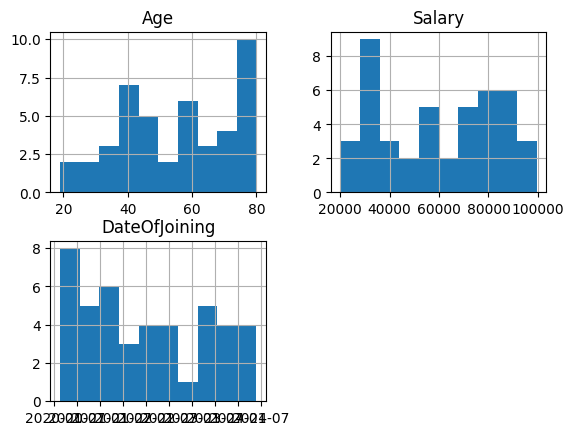

In [61]:
# Your code goes here
import matplotlib.pyplot as plt
import seaborn as sns
df.hist()
plt.xticks(rotation=45)
plt.show()

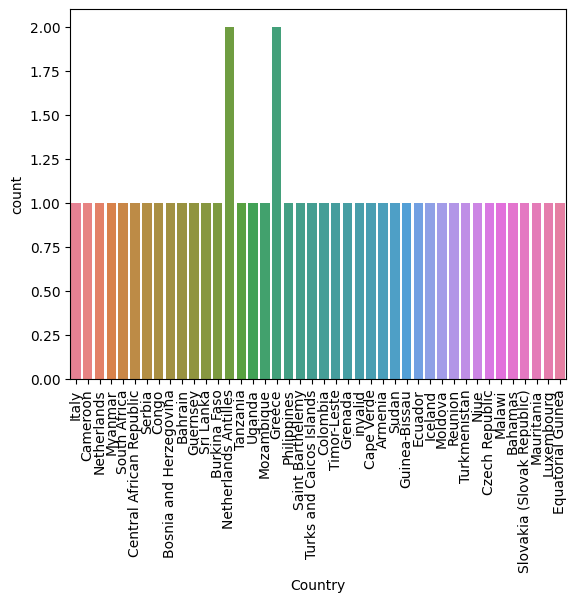

In [62]:
sns.countplot(data=df,x='Country',hue='Country')
plt.xticks(rotation=90)
plt.show()

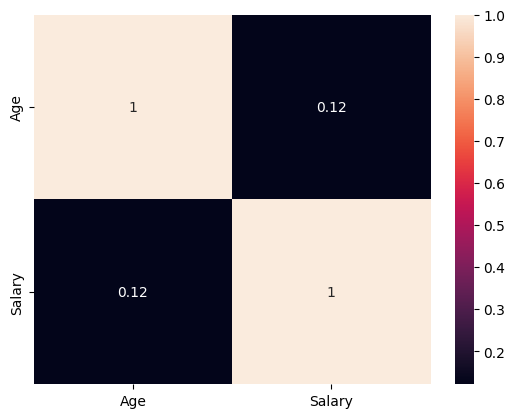

In [63]:
df_corr=df[['Age','Salary']]
corr_matrix=df_corr.corr()

sns.heatmap(corr_matrix,annot=True)
plt.show()